# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## Dataset yang digunakan : The AI, ML, Data Science Salary (2020- 2025)

**This Dataset containes the details of the AI, ML, Data Science Salary (2020- 2025).**
Salary data is in USD and recalculated at its average fx rate during the year for salaries entered in other currencies.

The data is processed and updated on a weekly basis so the rankings may change over time during the year.

Attribute Information

- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year with the following possible values:
   EN Entry-level / Junior
   MI Mid-level / Intermediate
   SE Senior-level / Expert
   EX Executive-level / Director
- employment_type: The type of employement for the role:
  PT Part-time
  FT Full-time
  CT Contract
  FL Freelance
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd: The salary in USD (FX rate divided by avg. USD rate of respective year) via statistical data from the BIS and central banks.
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio : The overall amount of work done remotely, possible values are as follows:
  0 No remote work (less than 20%)
  50 Partially remote/hybird
  100 Fully remote (more than 80%)
- company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- company_size: The average number of people that worked for the company during the year:
  S less than 50 employees (small)
  M 50 to 250 employees (medium)
  L more than 250 employees (large)


Acknowledgements

https://aijobs.net/

Photo by Anastassia Anufrieva on Unsplash

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA


d:\CODING\PYTHON\MACHINE_LEARNING\SUBMISSION ML PEMULA\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

### Menggunakan kaggle

In [2]:
path = kagglehub.dataset_download("samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025")
print("Path to dataset files:", path)
df = pd.read_csv(path + '/salaries.csv')

Path to dataset files: C:\Users\alfth\.cache\kagglehub\datasets\samithsachidanandan\the-global-ai-ml-data-science-salary-for-2025\versions\1


### Load dari lokal

In [3]:
df = pd.read_csv('dataset_inisiasi.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### Assesing data

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88584 entries, 0 to 88583
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           88584 non-null  int64 
 1   experience_level    88584 non-null  object
 2   employment_type     88584 non-null  object
 3   job_title           88584 non-null  object
 4   salary              88584 non-null  int64 
 5   salary_currency     88584 non-null  object
 6   salary_in_usd       88584 non-null  int64 
 7   employee_residence  88584 non-null  object
 8   remote_ratio        88584 non-null  int64 
 9   company_location    88584 non-null  object
 10  company_size        88584 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.4+ MB


In [8]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,88584.000000,88584,88584,88584,8.858400e+04,88584,88584.000000,88584,88584.000000,88584,88584
unique,NaN,4,4,312,NaN,26,NaN,96,NaN,90,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,51596,88111,13156,NaN,83994,NaN,79705,NaN,79762,85667
mean,2024.034758,NaN,NaN,NaN,1.619323e+05,NaN,157567.798417,NaN,21.286011,NaN,NaN
std,0.620370,NaN,NaN,NaN,1.965317e+05,NaN,73531.373158,NaN,40.831018,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.400000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN
25%,2024.000000,NaN,NaN,NaN,1.060000e+05,NaN,106097.250000,NaN,0.000000,NaN,NaN
50%,2024.000000,NaN,NaN,NaN,1.470000e+05,NaN,146307.000000,NaN,0.000000,NaN,NaN
75%,2024.000000,NaN,NaN,NaN,1.995000e+05,NaN,198600.000000,NaN,0.000000,NaN,NaN


Check Missing Value

In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

##### Analisis Distribusi, korelasi dan visualisasi data

fitur numerik

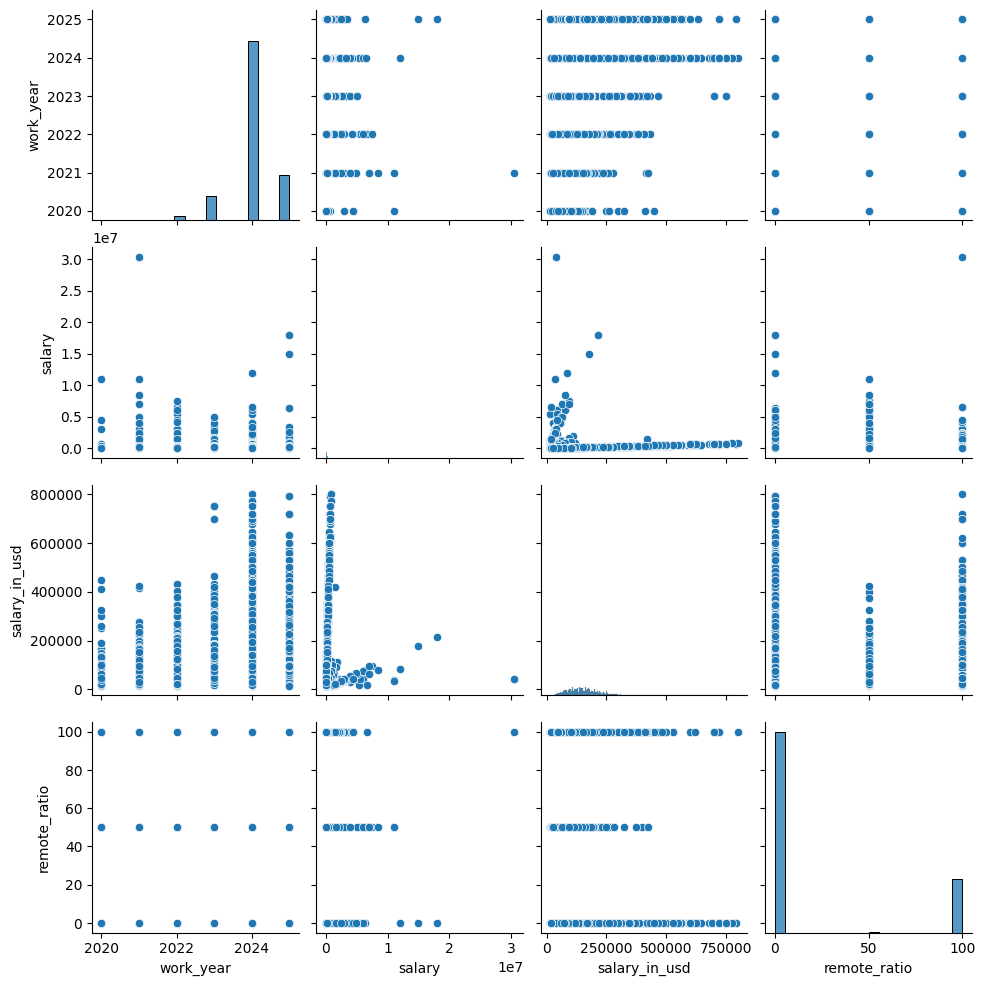

In [10]:
sns.pairplot(df)

array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

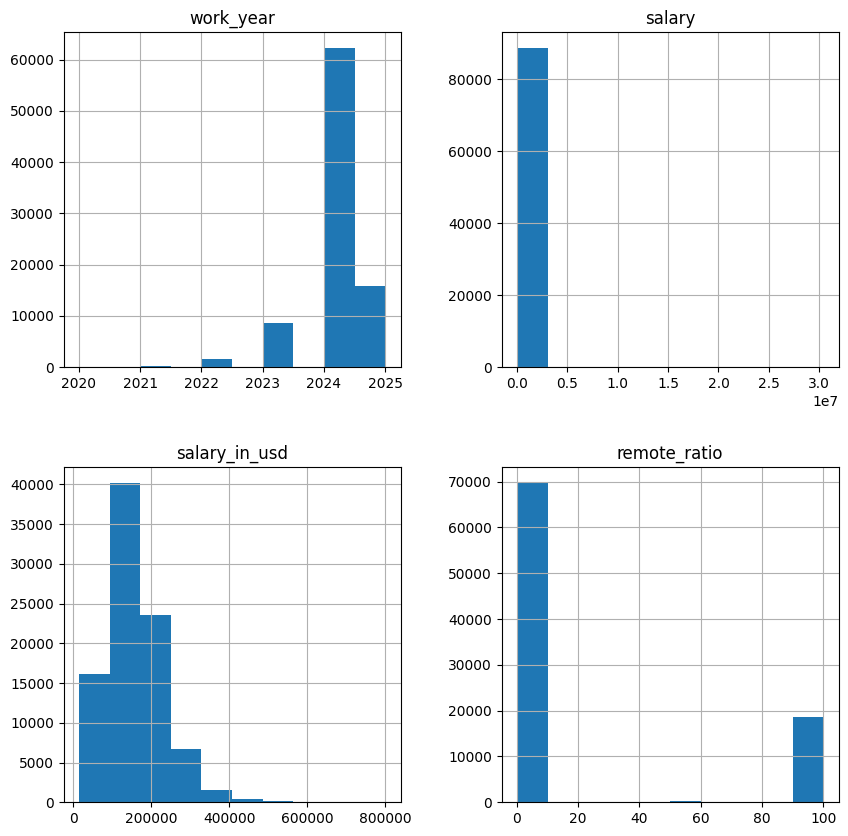

In [11]:
df.hist(figsize=(10, 10))

Fitur Kategori

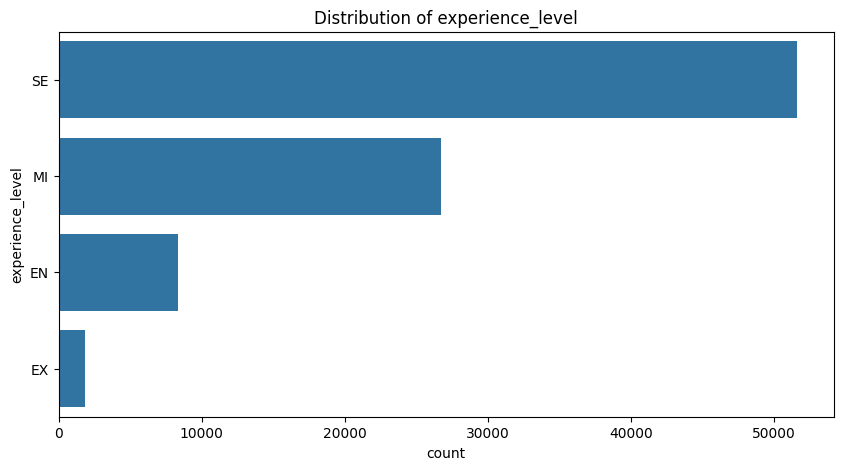

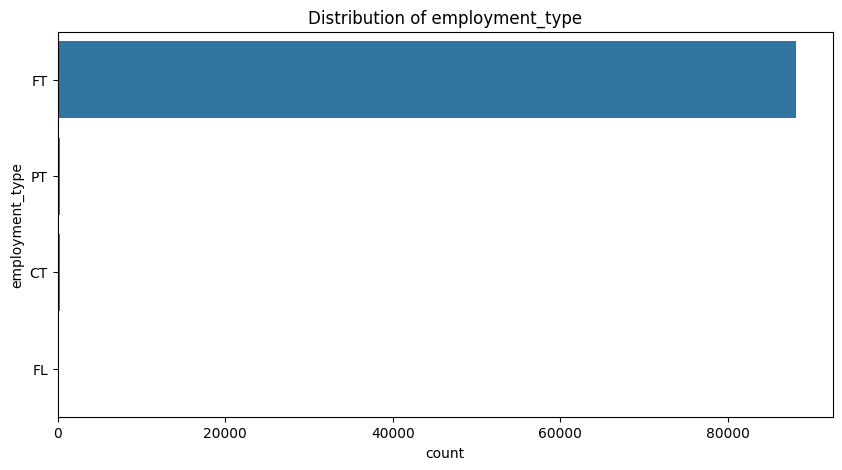

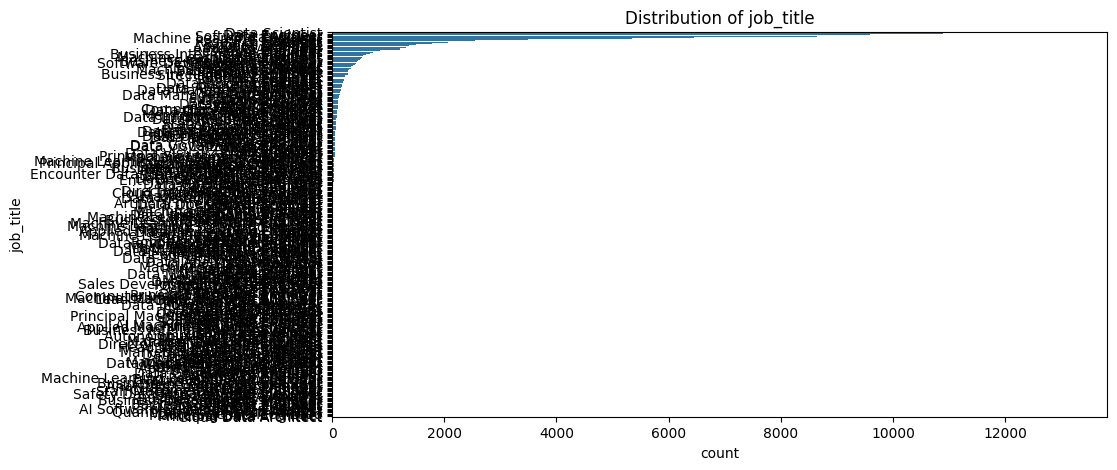

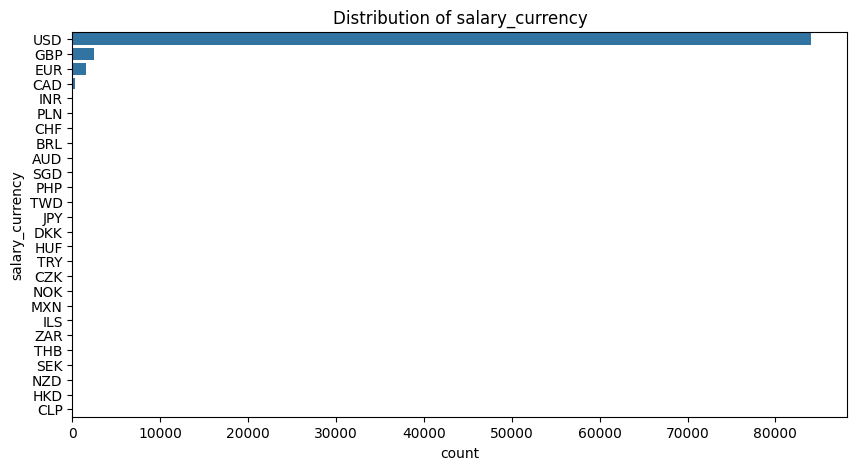

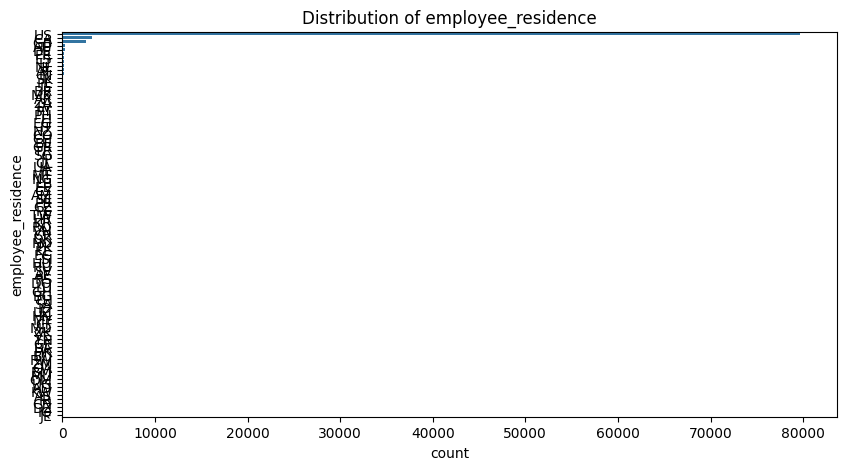

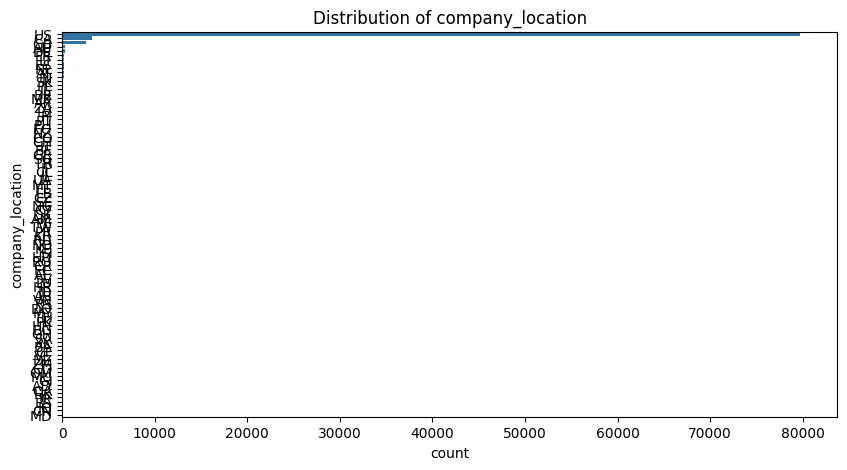

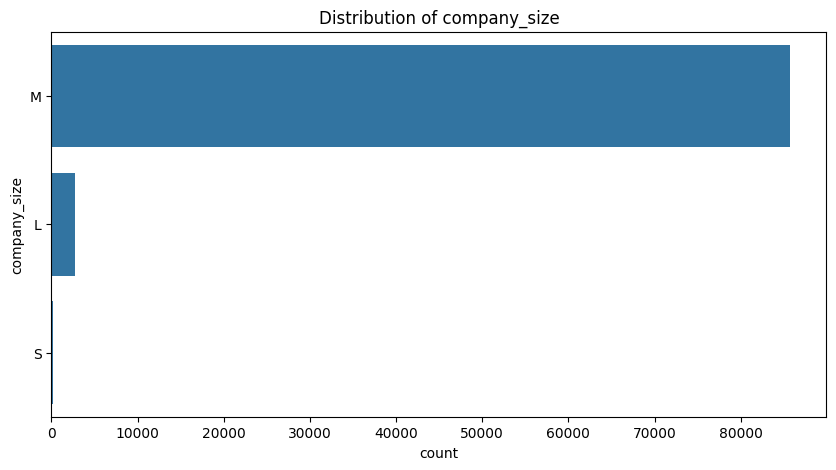

In [12]:
category = df.select_dtypes(include='object')
for col in category.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=category, order=category[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

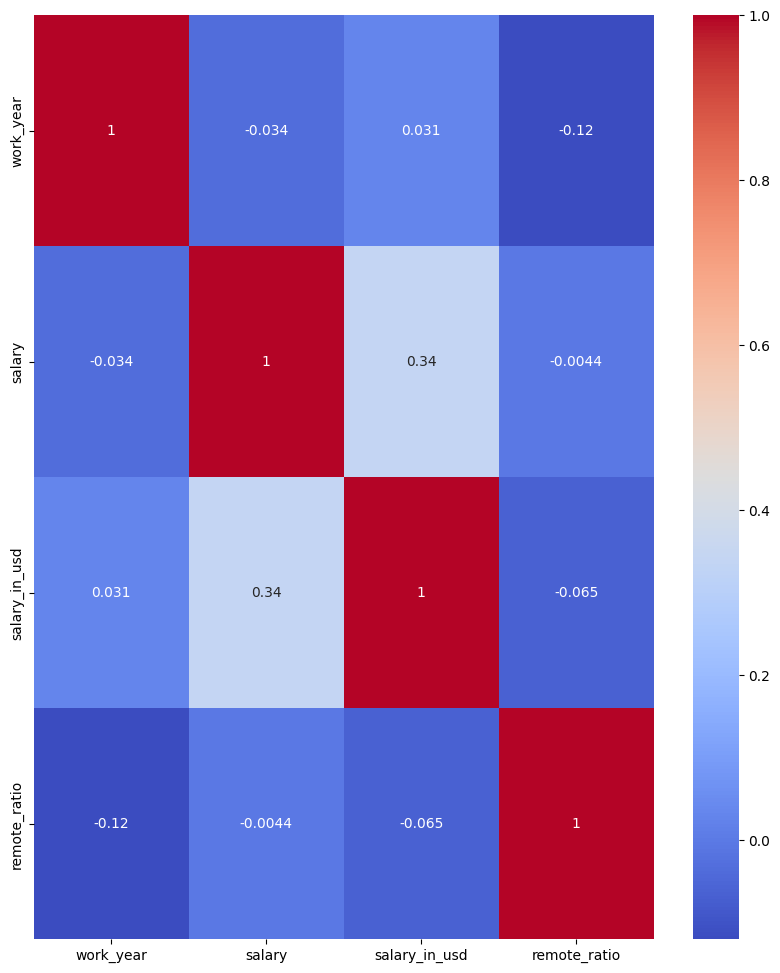

In [13]:
plt.figure(figsize=(10,12))
numerical = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

check data duplikat

In [14]:
df.duplicated().sum()

np.int64(44340)

Hapus data duplikat

In [15]:
df_clean = df.drop_duplicates()
df_clean

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


###### check outlier

In [16]:

def check_outlier(df):
    print('Outlier / jumlah data\n')
    for i in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        print(f'Outlier {i} : {round(df[(df[i] < lower) | (df[i] > upper)].shape[0] / df.shape[0] * 100,2)}%')

check_outlier(df_clean)

Outlier / jumlah data

Outlier work_year : 37.43%
Outlier salary : 2.54%
Outlier salary_in_usd : 2.38%
Outlier remote_ratio : 0.0%


In [17]:
def cap_outliers(df, cols):
    df = df.copy()  # Hindari SettingWithCopyWarning
    for i in cols:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df.loc[df[i] < lower_bound, i] = lower_bound
        df.loc[df[i] > upper_bound, i] = upper_bound
    return df

df_clean = cap_outliers(df_clean, ['salary', 'salary_in_usd'])


C:\Users\alfth\AppData\Local\Temp\ipykernel_2736\4241691084.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-44972.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] < lower_bound, i] = lower_bound


In [18]:
check_outlier(df_clean)

Outlier / jumlah data

Outlier work_year : 37.43%
Outlier salary : 0.0%
Outlier salary_in_usd : 0.0%
Outlier remote_ratio : 0.0%


work_year tidak dihilangkan karena tidak cocok dihitung dengan IQR(melihat dari distribusi data)

##### Encoding data kategori

pengecekan jumlah unique value di tiap fitur kategori

In [19]:
categorical_feature = df_clean.select_dtypes(include=['object','category'])
high_cardinal_column = []
low_cardinal_column = []
for col in categorical_feature.columns:
    print(f'unique value {col} : {categorical_feature[col].nunique()}')
    if categorical_feature[col].nunique() > 10:
        high_cardinal_column.append(col)
    else:
        low_cardinal_column.append(col)

unique value experience_level : 4
unique value employment_type : 4
unique value job_title : 312
unique value salary_currency : 26
unique value employee_residence : 96
unique value company_location : 90
unique value company_size : 3


memisahkan fitur high cardinality dan low cardinality

In [26]:
low_cardinal_feature = categorical_feature[low_cardinal_column]
high_cardinal_feature = categorical_feature[high_cardinal_column]

print(low_cardinal_feature.shape)
print(high_cardinal_feature.shape)

(44244, 3)
(44244, 4)


menggunakan dummy encoding untuk low cardinal feature tipe nominal

In [27]:
nominal_category = pd.get_dummies(low_cardinal_feature['employment_type'],drop_first=True)
nominal_category

,FL,FT,PT
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
88579,False,True,False
88580,False,True,False
88581,False,True,False
88582,False,False,False


menggunakan frequency encoding untuk job title

In [28]:
column = ['job_title','company_location','employee_residence','salary_currency']
for col in column:
    freq = high_cardinal_feature[col].value_counts()
    high_cardinal_feature.loc[:, col] = high_cardinal_feature[col].map(freq)

menggunakan label encoding untuk ordinal category

In [29]:
exp_lv_map = {
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
}

comp_size_map = {
    'S': 1,
    'M': 2,
    'L': 3
}

low_cardinal_feature.loc[:, 'experience_level'] = low_cardinal_feature['experience_level'].map(exp_lv_map)
low_cardinal_feature.loc[:, 'company_size'] = low_cardinal_feature['company_size'].map(comp_size_map)


In [30]:
low_cardinal_feature.drop(['employment_type'], axis=1, inplace=True)
low_cardinal_feature = pd.concat([low_cardinal_feature, nominal_category], axis=1)

C:\Users\alfth\AppData\Local\Temp\ipykernel_2736\1001176302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_cardinal_feature.drop(['employment_type'], axis=1, inplace=True)


menggabungkan kembali dengan numeric feature

In [31]:
numerical_feature = df_clean.select_dtypes(include=['int64', 'float64'])
df_encoded = pd.concat([numerical_feature,low_cardinal_feature,high_cardinal_feature], axis=1)
df_encoded

,work_year,salary,salary_in_usd,remote_ratio,experience_level,company_size,FL,FT,PT,job_title,salary_currency,employee_residence,company_location
0,2025,57000,60000.0,50,2,3,False,True,False,1,1233,168,168
1,2025,165000,165000.0,0,3,2,False,True,False,2515,40777,37388,37445
2,2025,109000,109000.0,0,3,2,False,True,False,2515,40777,37388,37445
3,2025,294000,294000.0,0,3,2,False,True,False,426,40777,37388,37445
4,2025,137600,137600.0,0,3,2,False,True,False,426,40777,37388,37445
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,335700,331487.5,100,3,3,False,True,False,5207,40777,37388,37445
88580,2021,151000,151000.0,100,2,3,False,True,False,10,40777,37388,37445
88581,2020,105000,105000.0,100,1,1,False,True,False,5207,40777,37388,37445
88582,2020,100000,100000.0,100,1,3,False,False,False,21,40777,37388,37445


sisa fitur tidak digunakan karena membuat curse of dimensionality dalam clustering (hasil trial & error)

##### Scaling Feature

In [32]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled

,work_year,salary,salary_in_usd,remote_ratio,experience_level,company_size,FL,FT,PT,job_title,salary_currency,employee_residence,company_location
0,1.0,0.133665,0.142186,0.5,0.333333,1.0,0.0,1.0,0.0,0.000000,0.030214,0.004467,0.004460
1,1.0,0.469381,0.473952,0.0,0.666667,0.5,0.0,1.0,0.0,0.482904,1.000000,1.000000,1.000000
2,1.0,0.295306,0.297010,0.0,0.666667,0.5,0.0,1.0,0.0,0.482904,1.000000,1.000000,1.000000
3,1.0,0.870376,0.881551,0.0,0.666667,0.5,0.0,1.0,0.0,0.081637,1.000000,1.000000,1.000000
4,1.0,0.384209,0.387377,0.0,0.666667,0.5,0.0,1.0,0.0,0.081637,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44239,0.0,1.000000,1.000000,1.0,0.666667,1.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000
44240,0.2,0.425863,0.429717,1.0,0.333333,1.0,0.0,1.0,0.0,0.001729,1.000000,1.000000,1.000000
44241,0.0,0.282872,0.284371,1.0,0.000000,0.0,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000
44242,0.0,0.267330,0.268573,1.0,0.000000,1.0,0.0,0.0,0.0,0.003842,1.000000,1.000000,1.000000


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [60]:
# kmeans clustering
n = 3
kmeans = KMeans(n_clusters=n, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = clusters

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

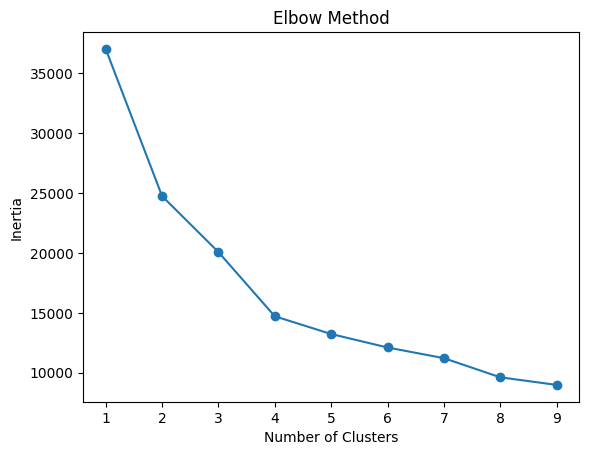

In [61]:

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()




In [73]:
kmeans = KMeans(n_clusters=n, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print("For n_clusters =", n,
      "The average silhouette_score is :", silhouette_avg)


For n_clusters = 3 The average silhouette_score is : 0.28170411184509664


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

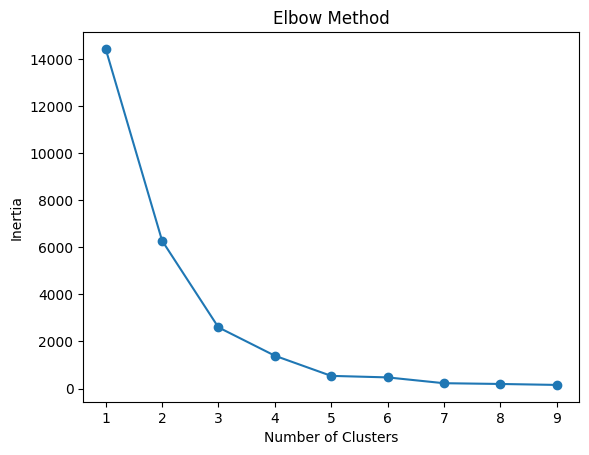

In [102]:

selector = VarianceThreshold(threshold=0.14)
df_selected = selector.fit_transform(df_scaled)

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[df_scaled.columns[selector.get_support()]])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()




Jumlah cluster yang digunakan adalah 3, menyesuaikan hasil elbow method setelah feature selection

In [103]:
column_selected = df_scaled.columns[selector.get_support()]
print(column_selected)

Index(['remote_ratio', 'job_title'], dtype='object')


In [108]:
# kmeans clustering
n = 5
kmeans = KMeans(n_clusters=n, random_state=42)
clusters = kmeans.fit_predict(df_scaled[column_selected])
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = clusters

In [109]:
silhouette_avg_selection = silhouette_score(df_scaled[column_selected], kmeans.labels_)
print("For n_clusters =", n,
      "The average silhouette_score is :", silhouette_avg_selection)

For n_clusters = 5 The average silhouette_score is : 0.765879884949207


perbedaan silhouette sebelum dan sesudah feature selection

In [110]:

print("Sebelum feature selection", silhouette_avg)
print("Setelah feature selection", silhouette_avg_selection)

Sebelum feature selection 0.28170411184509664
Setelah feature selection 0.765879884949207


Terlihat hasil cluster mengalami peningkatan yang signifikan setelah melakukan feature selection

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

C:\Users\alfth\AppData\Local\Temp\ipykernel_2736\1317042358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Cluster'] = clusters


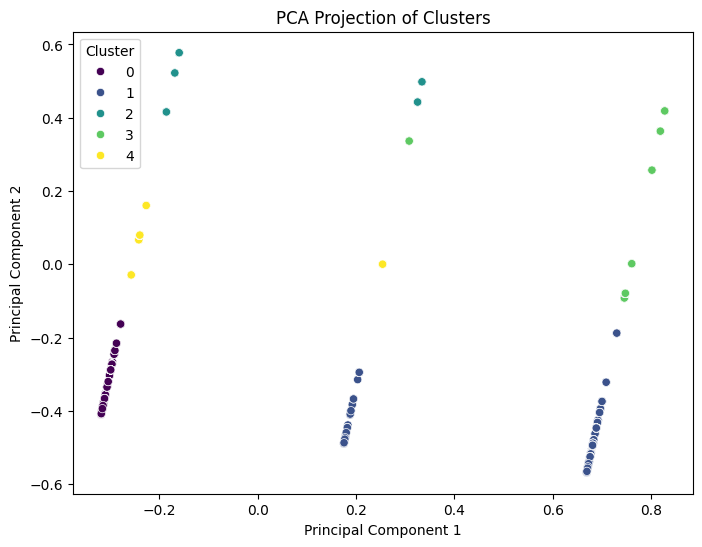

In [111]:


df_selected = df_scaled[column_selected]
df_selected['Cluster'] = clusters

pca = PCA(n_components=2)

pca_result = pca.fit_transform(df_selected.drop('Cluster', axis=1))

df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_selected['Cluster']


plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


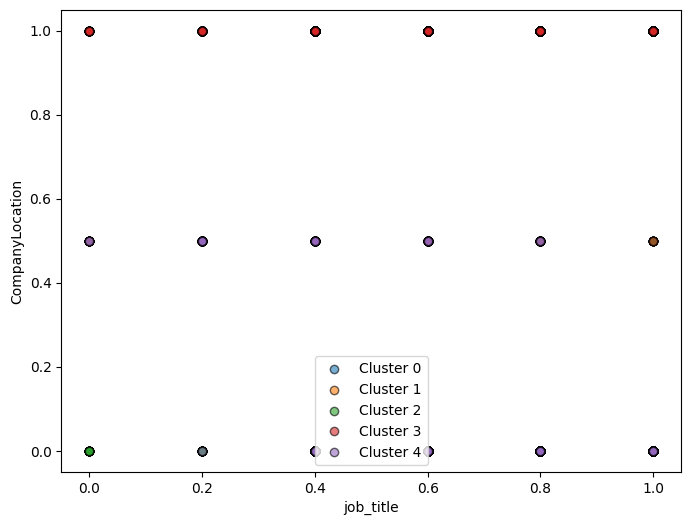

In [112]:

plt.figure(figsize=(8, 6))

unique_labels = np.unique(clusters)
for label in unique_labels:
    mask = clusters == label
    plt.scatter(
        df_clustered.loc[mask, df_clustered.columns[0]],  # Kolom pertama
        df_clustered.loc[mask, df_clustered.columns[3]],  # Kolom kedua
        label=f"Cluster {label}",
        alpha=0.6,
        edgecolors="k"
    )

plt.xlabel("job_title")
plt.ylabel("CompanyLocation")
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Dalam proses ini saya tidak melakukan inverse transform untuk proses normalisasi dan encoding, karena saya menyimpan dataset sebelum preprocessing itu

In [113]:
df_original_clustered = df_clean.copy()
df_original_clustered = df_original_clustered[column_selected]
df_original_clustered['Cluster'] = clusters
df_original_clustered

,remote_ratio,job_title,Cluster
0,50,Customer Success Manager,1
1,0,Engineer,4
2,0,Engineer,4
3,0,Applied Scientist,0
4,0,Applied Scientist,0
...,...,...,...
88579,100,Data Scientist,3
88580,100,Principal Data Scientist,1
88581,100,Data Scientist,3
88582,100,Business Data Analyst,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

#### Analisis Kluster

In [114]:
df_summary = df_original_clustered.groupby('Cluster').agg({
    'remote_ratio': ['mean', 'min', 'max'],
    'job_title': [('mode', lambda x: x.mode().iloc[0]),
                  ('count', lambda x: (x == x.mode().iloc[0]).sum())],
})


# Tambahkan distribusi jumlah sampel per cluster
cluster_distribution = df_original_clustered['Cluster'].value_counts().rename("count").sort_index()

# Gabungkan ke summary
df_summary['Cluster Size'] = cluster_distribution

df_summary


remote_ratio                   job_title       Cluster Size
                mean min  max               mode count             
Cluster                                                            
0           0.000000   0    0            Analyst  1017        14991
1          98.562709  50  100            Manager   421         5079
2           0.498418   0   50     Data Scientist  3821        10433
3          99.824297  50  100      Data Engineer  1411         5976
4           0.148100   0   50  Software Engineer  2317         7765


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.



---

### **Cluster 0 (Analyst – Fully Onsite)**
- **Rata-rata Remote Ratio:** 0.000000  
- **Min-Max Remote Ratio:** 0 – 0  
- **Modus Job Title:** Analyst  
- **Cluster Size:** 14.991 pekerja  
- **Analisis:**  
  - Cluster ini berisi **Analis yang seluruhnya bekerja secara onsite**.  
  - Tidak ada pekerja remote dalam cluster ini.  
  - Jumlah pekerja dalam cluster ini adalah yang terbanyak dibanding cluster lain.  

---

### **Cluster 1 (Manager – Mostly Remote)**
- **Rata-rata Remote Ratio:** 98.56  
- **Min-Max Remote Ratio:** 50 – 100  
- **Modus Job Title:** Manager  
- **Cluster Size:** 5.079 pekerja  
- **Analisis:**  
  - Cluster ini didominasi oleh **Manager** yang sebagian besar bekerja secara remote.  
  - Hampir semua pekerja di cluster ini memiliki **remote ratio tinggi**, dengan nilai minimum 50 dan maksimum 100.  
  - Cluster ini memiliki jumlah pekerja paling sedikit dibanding yang lain.  

---

### **Cluster 2 (Data Scientist – Mostly Hybrid/Onsite)**
- **Rata-rata Remote Ratio:** 0.50  
- **Min-Max Remote Ratio:** 0 – 50  
- **Modus Job Title:** Data Scientist  
- **Cluster Size:** 10.433 pekerja  
- **Analisis:**  
  - Cluster ini berisi **Data Scientist yang sebagian besar bekerja secara onsite atau hybrid**.  
  - Remote ratio cukup rendah, dengan batas maksimum hanya 50.  
  - Salah satu cluster terbesar dalam jumlah pekerja.  

---

### **Cluster 3 (Data Engineer – Mostly Remote)**
- **Rata-rata Remote Ratio:** 99.82  
- **Min-Max Remote Ratio:** 50 – 100  
- **Modus Job Title:** Data Engineer  
- **Cluster Size:** 5.976 pekerja  
- **Analisis:**  
  - Cluster ini berisi **Data Engineer yang hampir seluruhnya bekerja secara remote**.  
  - Mirip dengan cluster Manager, mayoritas memiliki remote ratio tinggi, menunjukkan bahwa pekerjaan ini lebih fleksibel untuk dilakukan secara jarak jauh.  

---

### **Cluster 4 (Software Engineer – Mostly Onsite/Hybrid)**
- **Rata-rata Remote Ratio:** 0.15  
- **Min-Max Remote Ratio:** 0 – 50  
- **Modus Job Title:** Software Engineer  
- **Cluster Size:** 7.765 pekerja  
- **Analisis:**  
  - Cluster ini berisi **Software Engineer yang mayoritas bekerja secara onsite atau hybrid**.  
  - Remote ratio sangat rendah, dengan batas maksimum hanya 50.  
  - Cluster ini memiliki jumlah pekerja yang cukup besar.  


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

menyimpan data yang telah di encoding dan normalisasi, tetapi hanya fitur yang sudah di seleksi dengan feature selection

In [116]:

df_clustered = df_scaled.copy()
df_clustered = df_clustered[column_selected]
df_clustered['Cluster'] = clusters
df_clustered.to_csv('dataset_clustering.csv', index=False)
